In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


%matplotlib inline

df_final_demo = pd.read_csv("../01_data/df_final_demo.txt")
df_final_demo

df_final_experiment_clients = pd.read_csv("../01_data/df_final_experiment_clients.txt")
df_final_experiment_clients

df_final_web_data_pt_1 = pd.read_csv("../01_data/df_final_web_data_pt_1.txt")
df_final_web_data_pt_1

df_final_web_data_pt_2 = pd.read_csv("../01_data/df_final_web_data_pt_2.txt")
df_final_web_data_pt_2

df_final_web_data = pd.concat([df_final_web_data_pt_1,df_final_web_data_pt_2], axis= 0)
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [3]:
# This is the data set that contains the demograohic data of the clients.
df_final_demo.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0


In [4]:
df_final_demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [5]:
# checking the two columns for nulls so that we can drop them
df_final_demo[df_final_demo['clnt_age'].isnull() | df_final_demo['gendr'].isnull()] 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop the rows with all nulls
df_final_demo = df_final_demo.dropna( subset = ['clnt_tenure_yr'])

In [7]:
df_final_demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            1
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [8]:
df_final_experiment_clients. head(10)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
5,9466803,Test
6,3170143,Test
7,6651403,Control
8,5887227,Test
9,2105948,Control


In [9]:
df_final_web_data_pt_1.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [10]:
df_final_web_data_pt_2.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
5,6019349,442094451_91531546617,154620534_35331068705_522317,start,2017-06-01 11:57:54
6,4726500,934350987_45569789638,467318052_88159801968_565608,confirm,2017-06-05 17:38:52
7,4726500,934350987_45569789638,467318052_88159801968_565608,step_3,2017-06-05 17:38:33
8,4726500,934350987_45569789638,467318052_88159801968_565608,step_2,2017-06-05 17:37:31
9,4726500,934350987_45569789638,467318052_88159801968_565608,step_1,2017-06-05 17:37:24


In [11]:
df_final_experiment_clients.isnull().value_counts()

#drop null values as this information is decisive for our KPIs
df_final_experiment_clients = df_final_experiment_clients.dropna(subset=['Variation'])
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [12]:
#Merge the variation and experiment data sets

df_final_web_data_client_id = pd.merge(df_final_experiment_clients,df_final_web_data, on = 'client_id', how = 'inner')
df_final_web_data_client_id

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [13]:
# final test group - for KPI

df_final_test = df_final_web_data_client_id[df_final_web_data_client_id['Variation'] == 'Test']
df_final_test

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [14]:
# final control group - for the KPI's

df_final_control = df_final_web_data_client_id[df_final_web_data_client_id['Variation'] == 'Control']
df_final_control

,client_id,Variation,visitor_id,visit_id,process_step,date_time
20,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
21,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
22,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
23,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08
24,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43
...,...,...,...,...,...,...
321265,393005,Control,238199953_33257685972,579367767_60788307935_908431,start,2017-03-29 15:25:20
321266,2908510,Control,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
321267,2908510,Control,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
321268,2908510,Control,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


In [15]:
df_final_demo.shape



(70595, 9)

In [16]:
#merge final demo that has the variations with final experiment clients datasets on client_id
# MASTER DEMOGRAPHIC DATASET merged with the ids

df_final_demo_client_id = pd.merge(df_final_experiment_clients,df_final_demo, on = 'client_id', how = 'inner')

df_final_demo_client_id

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50483,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50484,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50485,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50486,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [17]:
df_final_demo_client_id['gendr']=df_final_demo_client_id['gendr'].replace('X','U')
df_final_demo_client_id['gendr'].value_counts(normalize=True)

gendr
U    0.342299
M    0.335664
F    0.322037
Name: proportion, dtype: float64

In [18]:
df_final_demo_client_id.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048800e+04,50488.000000,50488.000000,50487.000000,50488.000000,5.048800e+04,50488.000000,50488.000000
mean,5.006173e+06,12.031730,150.415485,47.319795,2.254575,1.495147e+05,3.093289,6.131873
std,2.877417e+06,6.860282,81.944830,15.518616,0.533671,3.020364e+05,2.187991,2.175423
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515700e+06,6.000000,82.000000,33.500000,2.000000,3.987841e+04,1.000000,4.000000
50%,5.025026e+06,11.000000,136.000000,48.000000,2.000000,6.573360e+04,3.000000,6.000000
75%,7.477918e+06,16.000000,192.000000,59.500000,2.000000,1.399565e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [19]:


df_final_demo_control = df_final_demo_client_id[df_final_demo_client_id['Variation'] == 'Control']

df_final_demo_control.describe()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.352700e+04,23527.000000,23527.000000,23526.000000,23527.000000,2.352700e+04,23527.000000,23527.000000
mean,5.013661e+06,12.087686,151.060186,47.498427,2.259914,1.501473e+05,3.129213,6.166277
std,2.877353e+06,6.877531,82.126443,15.521781,0.538559,2.958070e+05,2.184502,2.173014
min,1.028000e+03,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000
25%,2.515289e+06,6.000000,82.000000,33.500000,2.000000,4.012335e+04,1.000000,4.000000
50%,5.023798e+06,11.000000,137.000000,48.500000,2.000000,6.602418e+04,3.000000,6.000000
75%,7.483504e+06,16.000000,192.000000,60.000000,2.000000,1.406060e+05,5.000000,8.000000
max,9.998921e+06,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000


In [20]:

df_final_demo_test = df_final_demo_client_id[df_final_demo_client_id['Variation'] == 'Test']

df_final_demo_test.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.696100e+04,26961.000000,26961.000000,26961.000000,26961.000000,2.696100e+04,26961.000000,26961.000000
mean,4.999639e+06,11.982901,149.852899,47.163922,2.249917,1.489626e+05,3.061941,6.101851
std,2.877510e+06,6.844947,81.783390,15.514461,0.529335,3.073737e+05,2.190590,2.177119
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516570e+06,6.000000,82.000000,33.500000,2.000000,3.972920e+04,1.000000,4.000000
50%,5.025928e+06,11.000000,134.000000,47.500000,2.000000,6.546836e+04,3.000000,6.000000
75%,7.470213e+06,15.000000,191.000000,59.500000,2.000000,1.394786e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [21]:
#Clean gender column from demographics table

df_final_demo_client_id['gendr']=df_final_demo_client_id['gendr'].replace('X','U')
df_final_demo_client_id['gendr'].value_counts(normalize=True)

gendr
U    0.342299
M    0.335664
F    0.322037
Name: proportion, dtype: float64

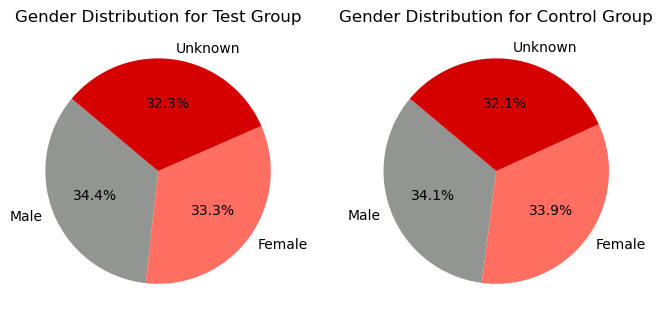

In [58]:
fig, axes = plt.subplots(1,2,figsize=(8,6))

sizes_test = df_final_demo_test['gendr'].value_counts(normalize=True)
labels_test = ['Male', 'Female', 'Unknown']  
sizes_control = df_final_demo_control['gendr'].value_counts(normalize=True)
labels_control = ['Male', 'Female', 'Unknown']  
colors = ['#96151d','#FFCDD2','#FF6F61'] 

grey_colors = ['#929591', '#FF6F61', '#D50000']

axes[0].pie(sizes_test, labels=labels_test, colors=grey_colors, autopct='%1.1f%%', startangle=140)
axes[1].pie(sizes_control, labels=labels_control, colors=grey_colors, autopct='%1.1f%%', startangle=140)

axes[0].set_title("Gender Distribution for Test Group")
axes[1].set_title("Gender Distribution for Control Group")

plt.savefig("Gender Distribution.png", transparent=True, bbox_inches='tight')
plt.show()

#96151d (actual vanguard red), #FFCDD2(light red/pink), #D50000 (tomato red), #FF6F61 (light salmon) #929591 (light grey) #595252 (dark grey)

In [23]:
df_final_demo_client_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50488 entries, 0 to 50487
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         50488 non-null  int64  
 1   Variation         50488 non-null  object 
 2   clnt_tenure_yr    50488 non-null  float64
 3   clnt_tenure_mnth  50488 non-null  float64
 4   clnt_age          50487 non-null  float64
 5   gendr             50488 non-null  object 
 6   num_accts         50488 non-null  float64
 7   bal               50488 non-null  float64
 8   calls_6_mnth      50488 non-null  float64
 9   logons_6_mnth     50488 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.9+ MB


In [24]:
df_final_demo_client_id.head()

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0


In [25]:
df_final_demo_client_id['clnt_age'].unique

<bound method Series.unique of 0        79.0
1        34.5
2        63.5
3        44.5
4        29.0
         ... 
50483    52.5
50484    34.0
50485    62.0
50486    30.5
50487    66.5
Name: clnt_age, Length: 50488, dtype: float64>

In [26]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['under 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']

df_final_demo_client_id['age_group'] = pd.cut(df_final_demo_client_id['clnt_age'], bins=bins, labels=labels, include_lowest=True)

df_final_demo_client_id.head()

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,71-80
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,31-40
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,61-70
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,41-50
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,21-30


In [27]:

age_group_counts = df_final_demo_client_id['age_group'].value_counts(normalize=True)
age_group_counts


age_group
51-60       0.219779
31-40       0.188306
61-70       0.175649
41-50       0.174065
21-30       0.167489
71-80       0.052766
under 20    0.011983
81-100      0.009963
Name: proportion, dtype: float64

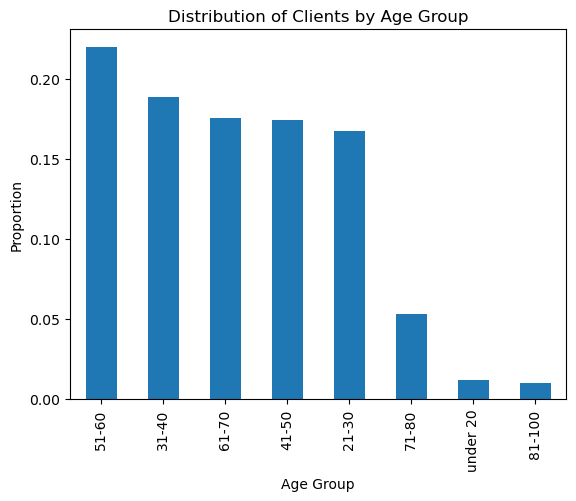

In [28]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['under 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']

# new column 'age_group' with the binned data
df_final_demo_client_id['age_group'] = pd.cut(df_final_demo_client_id['clnt_age'], bins=bins, labels=labels, include_lowest=True)

age_group_counts = df_final_demo_client_id['age_group'].value_counts(normalize=True)

age_group_counts.plot(kind="bar")

# Add titles and labels
plt.title('Distribution of Clients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()

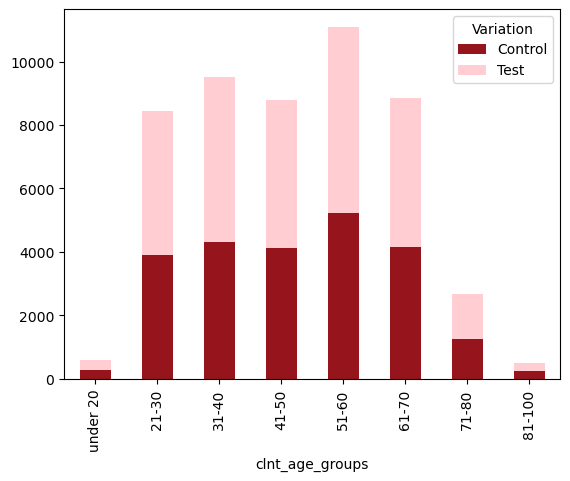

In [29]:
bins = [df_final_demo_client_id['clnt_age'].min(), 20, 30, 40, 50, 60, 70, 80 ,df_final_demo_client_id['clnt_age'].max()]
labels = ['under 20', '21-30', '31-40', '41-50','51-60','61-70','71-80','81-100' ]
df_final_demo_client_id['clnt_age_groups'] = pd.cut(df_final_demo_client_id['clnt_age'], bins=bins, labels=labels, include_lowest=True)

crosstab_age_group = pd.crosstab(df_final_demo_client_id['clnt_age_groups'], df_final_demo_client_id['Variation'])
crosstab_age_group

crosstab_age_group.plot(kind="bar",stacked=True, color=colors);

In [30]:
df_final_demo_client_id.head()

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group,clnt_age_groups
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,71-80,71-80
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,31-40,31-40
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,61-70,61-70
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,41-50,41-50
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,21-30,21-30


In [31]:
df_final_demo_client_id ['num_accts'].unique()

array([2., 3., 4., 5., 6., 7., 1.])

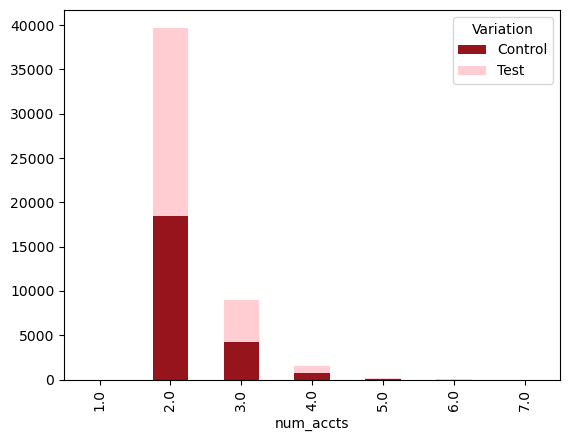

In [32]:
bins = [0, 1, 2, 3, 4, 5, 6, 7] 
labels = ['0-1', '2', '3', '4', '5', '6', '7'] 
df_final_demo_client_id['num_accts_binned'] = pd.cut(df_final_demo_client_id['num_accts'], bins=bins, labels=labels, right=False)

crosstab_age_group = pd.crosstab(df_final_demo_client_id['num_accts'], df_final_demo_client_id['Variation'])
crosstab_age_group

crosstab_age_group.plot(kind="bar",stacked=True, color=colors);

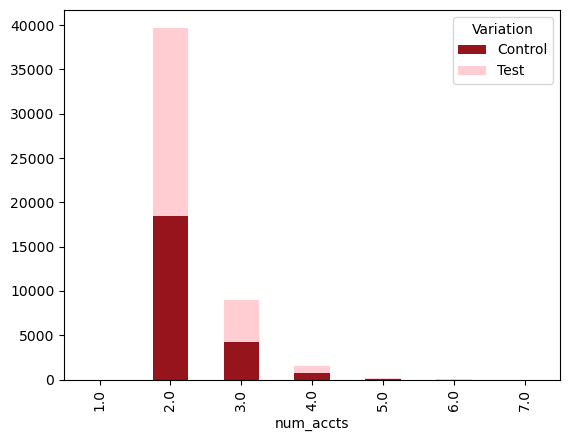

In [33]:
#final one - no need for bins as there are no ranges

crosstab_num_accts = pd.crosstab(df_final_demo_client_id['num_accts'], df_final_demo_client_id['Variation'])
crosstab_num_accts

crosstab_num_accts.plot(kind="bar",stacked=True, color=colors);

In [34]:
df_final_demo_client_id ['bal'].unique()

array([189023.86,  36001.9 , 142642.26, ...,  58778.11,  61349.7 ,
        93103.47])

In [35]:
df_final_demo_client_id['bal'].describe()

count    5.048800e+04
mean     1.495147e+05
std      3.020364e+05
min      2.378944e+04
25%      3.987841e+04
50%      6.573360e+04
75%      1.399565e+05
max      1.632004e+07
Name: bal, dtype: float64

In [36]:
quantiles = [0, 0.25, 0.5, 0.75, 1]
bins_quantile = df_final_demo_client_id['bal'].quantile(quantiles)
bins_quantile


0.00    2.378944e+04
0.25    3.987841e+04
0.50    6.573360e+04
0.75    1.399565e+05
1.00    1.632004e+07
Name: bal, dtype: float64

In [37]:
quantiles = [0, 0.25, 0.5, 0.75, 1]
bins_quantile = df_final_demo_client_id['bal'].quantile(quantiles)
labels_quantile = [f'{int(bins_quantile.iloc[i]):,} - {int(bins_quantile.iloc[i+1]):,}' for i in range(len(bins_quantile)-1)]
labels_quantile




['23,789 - 39,878',
 '39,878 - 65,733',
 '65,733 - 139,956',
 '139,956 - 16,320,040']

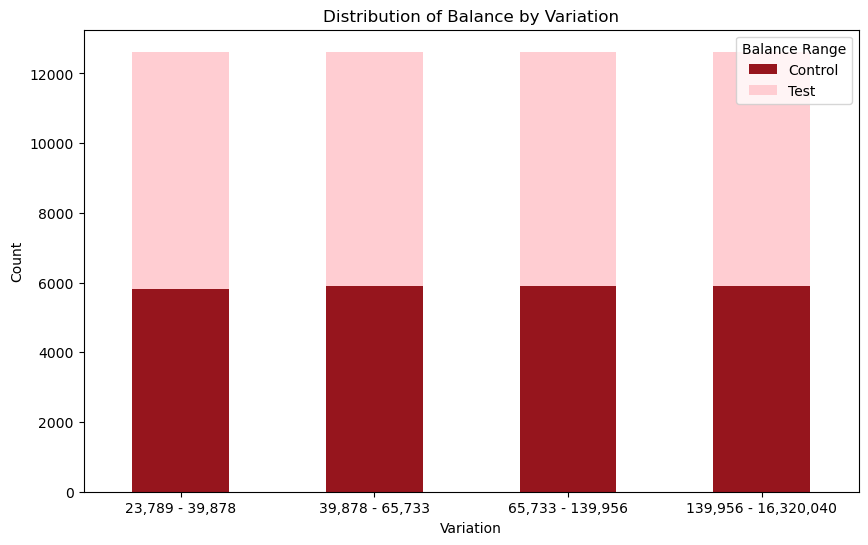

In [38]:
quantiles = [0, 0.25, 0.5, 0.75, 1]
bins_quantile = df_final_demo_client_id['bal'].quantile(quantiles)
labels_quantile = [f'{int(bins_quantile.iloc[i]):,} - {int(bins_quantile.iloc[i+1]):,}' for i in range(len(bins_quantile)-1)]
labels_quantile

df_final_demo_client_id['bal_binned_quantile'] = pd.cut(df_final_demo_client_id['bal'], bins=bins_quantile, labels=labels_quantile, include_lowest=True)

crosstab_equal_width = pd.crosstab(df_final_demo_client_id['bal_binned_quantile'], df_final_demo_client_id['Variation'])

ax_equal_width = crosstab_equal_width.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Distribution of Balance by Variation')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.legend(title='Balance Range')
plt.xticks(rotation=0)  
plt.show()





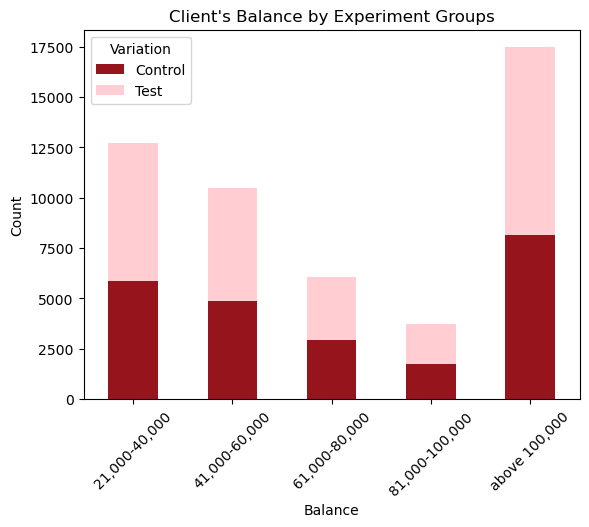

In [55]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 16320040] 
labels = ['0-20,000', '21,000-40,000', '41,000-60,000', '61,000-80,000', '81,000-100,000', 'above 100,000'] 

df_final_demo_client_id['bal_binned'] = pd.cut(df_final_demo_client_id['bal'], bins=bins, labels=labels)
crosstab_bal = pd.crosstab(df_final_demo_client_id['bal_binned'], df_final_demo_client_id['Variation'])
crosstab_bal

crosstab_bal.plot(kind="bar",stacked=True, color=colors);
plt.title("Client's Balance by Experiment Groups")
plt.ylabel("Count")
plt.xlabel("Balance")
plt.xticks(rotation=45)
plt.savefig("Client's Balance by Experiment Groups.png", transparent=True, bbox_inches='tight')
plt.show()



In [40]:
df_final_test

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [41]:
# sorting the date and time column for test 
df_final_test['date_time'] = pd.to_datetime(df_final_test['date_time'])
df_final_test['date'] = df_final_test['date_time'].dt.date
df_final_test['time'] = df_final_test['date_time'].dt.time
df_final_test = df_final_test.drop('date_time', axis=1)

display (df_final_test)

C:\Users\Nicole\AppData\Local\Temp\ipykernel_4648\3256818937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_test['date_time'] = pd.to_datetime(df_final_test['date_time'])
C:\Users\Nicole\AppData\Local\Temp\ipykernel_4648\3256818937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_test['date'] = df_final_test['date_time'].dt.date
C:\Users\Nicole\AppData\Local\Temp\ipykernel_4648\3256818937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,client_id,Variation,visitor_id,visit_id,process_step,date,time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:18:04
...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11,08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11,08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11,08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11,08:42:36


In [42]:
# sorting the date and time column for control

df_final_control['date_time'] = pd.to_datetime(df_final_control['date_time'])
df_final_control['date'] = df_final_control['date_time'].dt.date
df_final_control['time'] = df_final_control['date_time'].dt.time
df_final_control = df_final_control.drop('date_time', axis=1)

display (df_final_control)

C:\Users\Nicole\AppData\Local\Temp\ipykernel_4648\3748609319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_control['date_time'] = pd.to_datetime(df_final_control['date_time'])
C:\Users\Nicole\AppData\Local\Temp\ipykernel_4648\3748609319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_control['date'] = df_final_control['date_time'].dt.date
C:\Users\Nicole\AppData\Local\Temp\ipykernel_4648\3748609319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,client_id,Variation,visitor_id,visit_id,process_step,date,time
20,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:03
21,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:01
22,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:28:52
23,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05,12:26:08
24,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05,12:24:43
...,...,...,...,...,...,...,...
321265,393005,Control,238199953_33257685972,579367767_60788307935_908431,start,2017-03-29,15:25:20
321266,2908510,Control,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10,22:57:17
321267,2908510,Control,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10,22:56:31
321268,2908510,Control,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10,22:56:23


In [43]:
df_completed_test_users = df_final_test[df_final_test['process_step'] == 'confirm']
df_completed_test_users.sort_valuesby=['visitor_id', 'date', 'time']
df_completed_test_users

C:\Users\Nicole\AppData\Local\Temp\ipykernel_4648\1243189354.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_completed_test_users.sort_valuesby=['visitor_id', 'date', 'time']


,client_id,Variation,visitor_id,visit_id,process_step,date,time
15,8320017,Test,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05,13:10:05
35,1982004,Test,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17,12:02:42
48,3170143,Test,837774974_91015515080,758001412_25057963943_219559,confirm,2017-04-04,18:41:44
73,5887227,Test,448202785_26003228044,458489157_53226123692_778999,confirm,2017-04-05,14:52:34
99,438567,Test,694624747_14580652583,787486191_38787201768_120150,confirm,2017-06-08,16:46:39
...,...,...,...,...,...,...,...
321219,5969816,Test,470587199_31947711941,312260787_57270254471_839042,confirm,2017-04-06,10:10:49
321231,8692087,Test,87619541_16268405483,654226272_50322046833_890618,confirm,2017-03-29,17:29:18
321232,8692087,Test,87619541_16268405483,654226272_50322046833_890618,confirm,2017-03-29,17:28:07
321295,5230357,Test,832474317_11880812098,28245330_61880751416_631586,confirm,2017-04-19,11:24:46


In [44]:
#checking for number of duplicates within the confirm subset of the process_step
duplicates = df_completed_test_users.duplicated(subset=['client_id', 'visitor_id', 'visit_id'])
duplicate_count = duplicates.sum()
duplicate_count

3931

In [45]:
# analyzed only the first stamp of the vistor_id 
df_sorted = df_final_test.sort_values(by=['visitor_id', 'date', 'time'])
df_first_time = df_sorted.drop_duplicates(subset=['time'], keep='first')

completed_test = df_first_time[df_first_time['process_step'] == 'confirm']['visitor_id'].nunique()

total_test = df_first_time['visitor_id'].nunique()

completion_rate = (completed_test / total_test) * 100

print(completion_rate)

36.89387917329094


In [46]:
df_first_time['visitor_id'].nunique()

20128

In [47]:
# defining a funtion
def calculate_completion_rate(df):
    df_sorted = df.sort_values(by=['visitor_id', 'date', 'time'])
    df_first_time = df_sorted.drop_duplicates(subset=['time'], keep='first')
    completed_test = df_first_time[df_first_time['process_step'] == 'confirm']['visitor_id'].nunique()
    total_test = df_first_time['visitor_id'].nunique()
    completion_rate = (completed_test / total_test) * 100
    return f"{completion_rate:.2f}%"

In [48]:
#completed_test_users = df_final_test[df_final_test['process_step'] == 'confirm']
#df_final_test.duplicates(subset=['process_step'] == 'confirm', inplace = True)
#df_final_test.groubby
# create a new column that take one confirm per vistor id and that = True

# client id . nunique of the 
# sort the date and time, time in ascending order, drop if duplicated 
# first time stamp the vistor id reached the confirm step

#visits_with_error_test = df_final_test.groupby('visit_id')['error_step'].any()

In [49]:
total_control_users = df_final_control['visitor_id'].nunique()
total_test_users = df_final_test['visitor_id'].nunique()

In [50]:
#Completion rates if we drop duplicates

control_confirmed_users = df_final_control[df_final_control['process_step'] == 'confirm']['visitor_id'].drop_duplicates()
test_confirmed_users = df_final_test[df_final_test['process_step'] == 'confirm']['visitor_id'].drop_duplicates()

# unique_users who completed the process
completed_control_users = len(control_confirmed_users)
completed_test_users = len(test_confirmed_users)

# Total number of unique users in each group
total_control_users = df_final_control['visitor_id'].nunique()
total_test_users = df_final_test['visitor_id'].nunique()

# completion rates
control_group_completion_rate = completed_control_users / total_control_users
test_group_completion_rate = completed_test_users / total_test_users

# Output the completion rates
print(f"Control Group Completion Rate: {control_group_completion_rate:.2%}")
print(f"Test Group Completion Rate: {test_group_completion_rate:.2%}")

Control Group Completion Rate: 59.24%
Test Group Completion Rate: 65.19%


In [51]:
#Completion rates if we don't drop duplicates

control_confirmed_users = df_final_control[df_final_control['process_step'] == 'confirm']['visitor_id']
test_confirmed_users = df_final_test[df_final_test['process_step'] == 'confirm']['visitor_id']

# unique_users who completed the process
completed_control_users = len(control_confirmed_users)
completed_test_users = len(test_confirmed_users)

# Total number of unique users in each group
total_control_users = df_final_control['visitor_id'].nunique()
total_test_users = df_final_test['visitor_id'].nunique()

# completion rates
control_group_completion_rate = completed_control_users / total_control_users
test_group_completion_rate = completed_test_users / total_test_users

# Output the completion rates
print(f"Control Group Completion Rate: {control_group_completion_rate:.2%}")
print(f"Test Group Completion Rate: {test_group_completion_rate:.2%}")

Control Group Completion Rate: 66.62%
Test Group Completion Rate: 85.97%


In [52]:
# ​​Completion Rate: The proportion of users who reach the final ‘confirm’ step
# A client is said to him completed the process if he reached the confirm step. 
# For the purrpose of analysis and to compare we took the first time stamp that the client reached the confirm step.
# This rules out duplications for the same client_id

# Steps:
# 1) sort the values of the visitor_id, date, time column 
# 2) keep the first time stamp of confirm per visitor_id and drop the rest
# 3) count the number of unique values = completed test count
# 4) count the number of total visitor_id = total test count
# 5) completion rate = completed test / total_test
# 6) return completion_rate upto two decimals and with a percent sign %


def calculate_completion_rate(df):
    df_sorted = df.sort_values(by=['visitor_id', 'date', 'time'])
    df_first_time = df_sorted.drop_duplicates(subset=['time'], keep='first')
    completed_test = df_first_time[df_first_time['process_step'] == 'confirm']['visitor_id'].nunique()
    total_test = df_first_time['visitor_id'].nunique()
    completion_rate = (completed_test / total_test) * 100
    return f"{completion_rate:.2f}%"


In [53]:
completion_rate_test = calculate_completion_rate(df_final_test)
completion_rate_control = calculate_completion_rate(df_final_control)

print (completion_rate_test)
print (completion_rate_control)

36.89%
34.06%


In [54]:
#Testing the Hypothesis
#H0 completion_rate_test = complettion_rate_contol
#H1 completion_rate_test > completion_rate_control
#alpha = 0.05

import statsmodels.api as sm
from math import sqrt

#test for proportions?? 
n_test = df_final_test['visitor_id'].nunique()
n_control = df_final_control['visitor_id'].nunique()

completion_rate_test = calculate_completion_rate(df_final_test)
completion_rate_control = calculate_completion_rate(df_final_control)

#calculate the number of completions
x_test = completion_rate_test * total_test
x_control = completion_rate_control * total_control

count = np.array([x_test, x_control])
nobs = np.array([n_test, n_control])

z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='larger')



NameError: name 'total_control' is not defined

In [ ]:
# Average time spent on each step

def average_time_spent_on_each_step(df):
    df['date'] = df['date'].astype(str)
    df['time'] = df['time'].astype(str)
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    df = df.sort_values(by=['visit_id', 'datetime'])
    df['duration'] = df.groupby(['visit_id'])['datetime'].diff(-1).dt.total_seconds()
    df['duration'] = df['duration'].abs()
    average_step_durations = df.groupby('process_step')['duration'].mean()
    average_step_durations_minutes = average_step_durations / 60
    return average_step_durations_minutes

In [ ]:
average_durations_test_group = average_time_spent_on_each_step(df_final_test)
average_durations_control_group = average_time_spent_on_each_step(df_final_control)

print(average_durations_test_group )
print(average_durations_control_group )

In [ ]:
def plot_average_durations_comparison(test_group, control_group):
    process_steps = test_group.index
    test_durations = test_group.values
    control_durations = control_group.values

    # Set the positions and width for the bars
    bar_width = 0.35
    index = np.arange(len(process_steps))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot both control and test group bars
    plt.bar(index, control_durations, bar_width, label='Control Group', color='lightcoral')
    plt.bar(index + bar_width, test_durations, bar_width, label='Test Group', color='skyblue')

    # Add labels, title, and grid
    plt.xlabel('Process Step')
    plt.ylabel('Average Duration (minutes)')
    plt.title('Comparison of Average Duration by Process Step: Control vs. Test Groups')
    plt.xticks(index + bar_width / 2, process_steps)
    plt.legend()

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_average_durations_comparison(average_durations_test_group, average_durations_control_group)

In [ ]:
#Hypothesis Testing
#GOAL: to assess the efficiency of a process and determine if changes reduce time spent per step.
#H0: average_durations_test_group >= average_durations_control_group
#H1: average_durations_test_group < average_durations_control_group 
#(suggesting that the test group takes significantly less time to complete each step compared to the control group)
    #one-sided so one-tailed t-test 
#alpha = 0.05

#two independent groups, two sample t-test, one-tailed t-test
import scipy.stats as st

average_durations_test_group = [3.971134, 1.009534, 1.009814, 1.476842, 2.148741]  
average_durations_control_group = [2.627372, 1.048043, 0.837757, 1.526548, 2.257719]  

t_stat,p_value = st.ttest_ind(average_durations_test_group,average_durations_control_group, equal_var=False, alternative="less")

alpha = 0.05

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis (H0). There is sufficient evidence to suggest that the test group spends less time on average.")
else:
    print("Accept the null hypothesis (H0). There is insufficient evidence to suggest that the test group spends less time on average.")

Conclusion:
There is insufficient evidence to support the claim that the test group spends significantly less time on each step compared to the control group. In fact, the high p-value suggests that any observed difference in the time spent on each step could easily be due to random chance. Therefore, we cannot conclude that the test group is faster than the control group based on the given data.

In [ ]:
#Hypothesis Testing
#GOAL: to assess the efficiency of a process and determine if changes reduce time spent per step.
#H0: average_durations_test_group <= average_durations_control_group
#H1: average_durations_test_group > average_durations_control_group 
#(suggesting that the test group takes significantly less time to complete each step compared to the control group)
    #one-sided so one-tailed t-test 
#alpha = 0.05

#two independent groups, two sample t-test, one-tailed t-test
import scipy.stats as st

average_durations_test_group = [3.971134, 1.009534, 1.009814, 1.476842, 2.148741]  
average_durations_control_group = [2.627372, 1.048043, 0.837757, 1.526548, 2.257719]  

t_stat,p_value = st.ttest_ind(average_durations_test_group, average_durations_control_group,equal_var=False, alternative="greater")

alpha = 0.05

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis (H0). There is sufficient evidence to suggest that the test group spends less time on average.")
else:
    print("Fail to reject the null hypothesis (H0). There is insufficient evidence to suggest that the test group spends less time on average.")

In [ ]:
df_final_test

In [ ]:
df_final_test['process_step'].unique()

In [ ]:
#n(n+1) - n = duration per step

# def error_rate(df):
    """calculate the error rate based on process_step column"""
    df['process_step_number'] = df['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2,'step_3': 3,'confirm': 4})
    df['step_diff'] = df.groupby('visit_id')['process_step_number'].diff(-1)
    count_visits_with_error = df[df['step_diff'] < 0]['step_diff'].count()
    error_visits_rate = count_visits_with_error / df.visit_id.count()
    return error_visits_rate


In [ ]:
#Convert the date and time columns to a single datetime column
#This is so that we have correct sequence and i can accurately gather the time for each day. Also I am just dealing with one column

#Calculate the time spent between steps.
#Aggregate the time spent for each step.
#Compute the mean duration for each step.


In [ ]:
df_final_test['datetime'] = pd.to_datetime(df_final_test['date'] + ' ' + df_final_test['time'])
    


In [ ]:
print (df_final_test.dtypes)

In [ ]:
#change the dataype to string so that we can concat them into one column
df_final_test['date'] = df_final_test['date'].astype(str)
df_final_test['time'] = df_final_test['time'].astype(str)

df_final_test['datetime'] = pd.to_datetime(df_final_test['date'] + ' ' + df_final_test['time'])
    
df_final_test

In [ ]:
#df_final_test = df_final_test.sort_values(by=['visit_id', 'datetime'],ascending=False)
#df_final_test['duration'] = df_final_test.groupby(['visit_id'])['datetime'].diff(-1).dt.total_seconds()
#df_final_test['duration'] = df_final_test['duration'].fillna(0)

#df_final_test


In [ ]:
df_final_test = df_final_test.sort_values(by=['visit_id', 'datetime'])
df_final_test['duration'] = df_final_test.groupby(['visit_id'])['datetime'].diff(-1).dt.total_seconds()

df_final_test['duration'] = df_final_test['duration'].abs()

#df_final_test['duration'] = df_final_test['duration'].fillna(0)

df_final_test


In [ ]:
visit_id_to_check = df_final_test[df_final_test['visit_id'] == '999988789_76411676596_272843']
visit_id_to_check

In [ ]:
average_step_durations = df_final_test.groupby('process_step')['duration'].mean()
average_step_durations # in seconds

In [ ]:
average_step_durations_sorted = average_step_durations.sort_values(ascending=False)
average_step_durations_sorted

In [ ]:
average_step_durations_minutes = average_step_durations / 60
average_step_durations_minutes

In [ ]:
process_steps = ['confirm', 'start', 'step_1', 'step_2', 'step_3']
average_durations_minutes = [3.971134, 1.009534, 1.009814, 1.476842, 2.148741]

plt.figure(figsize=(10, 6))
plt.barh(process_steps, average_durations_minutes, color='skyblue')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Process Step')
plt.title('Average Duration of Each Process Step')
plt.gca().invert_yaxis()  # Optional: invert y-axis to have the highest value on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
visit_id_to_check = df_final_test[df_final_test['visit_id'] == '999988789_76411676596_272843']
visit_id_to_check

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

#H0 = error rate test group >= error rate control group
#H1 = error rate test group < error rate control group

def calculate_errors_and_visits(df):
    df['process_step_number'] = df['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2,'step_3': 3,'confirm': 4})
    df['step_diff'] = df.groupby('visit_id')['process_step_number'].diff(-1)
    count_errors = df[df['step_diff'] < 0]['step_diff'].count()
    total_visits = df['visit_id'].nunique()  # Number of unique visits
    return count_errors, total_visits

# Calculate errors and visits for both groups
errors_test, visits_test = calculate_errors_and_visits(df_final_test)
errors_control, visits_control = calculate_errors_and_visits(df_final_control)

# Z-test for proportions
count = [errors_test, errors_control]
nobs = [visits_test, visits_control]
stat, p_value = proportions_ztest(count, nobs, alternative='smaller')  # One-tailed test

print(f"Z-statistic: {stat}, P-value: {p_value}")

# print the test result
if p_value < 0.05:
    print('The null hypothesis is rejected. The error rate in the test group is lower than the control group.')
else:
    print('We do not have sufficient proof to reject null hypothesis. We cannot confirm the error rate in the test group is lower than in the control group.')

print('P-value of one might suggest that the error rates between the groups are either identical or very close, leading to a very small difference being inflated by the large sample sizes.')